# Loan Forecasting - EDA & Visualization
# Exploratory Data Analysis for loan forecasting dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load and clean data
df = pd.read_csv('../data-files/loan_forcast.csv')

In [3]:
def clean_numeric(value):
    if pd.isna(value):
        return np.nan
    if isinstance(value, str):
        cleaned = ''.join(c for c in value if c.isdigit() or c == '.')
        return float(cleaned) if cleaned else np.nan
    return float(value)

numeric_cols = ['customer_income', 'loan_amnt', 'loan_int_rate', 
                'employment_duration', 'term_years', 'cred_hist_length']

for col in numeric_cols:
    df[col] = df[col].apply(clean_numeric)

In [4]:
# Basic info
print("Dataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isna().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32586 entries, 0 to 32585
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          32583 non-null  float64
 1   customer_age         32586 non-null  int64  
 2   customer_income      32586 non-null  float64
 3   home_ownership       32586 non-null  object 
 4   employment_duration  31691 non-null  float64
 5   loan_intent          32586 non-null  object 
 6   loan_grade           32586 non-null  object 
 7   loan_amnt            32585 non-null  float64
 8   loan_int_rate        29470 non-null  float64
 9   term_years           32586 non-null  float64
 10  historical_default   11849 non-null  object 
 11  cred_hist_length     32586 non-null  float64
 12  Current_loan_status  32582 non-null  object 
dtypes: float64(7), int64(1), object(5)
memory usage: 3.2+ MB
None

Missing Values:
customer_id                3
customer_age  

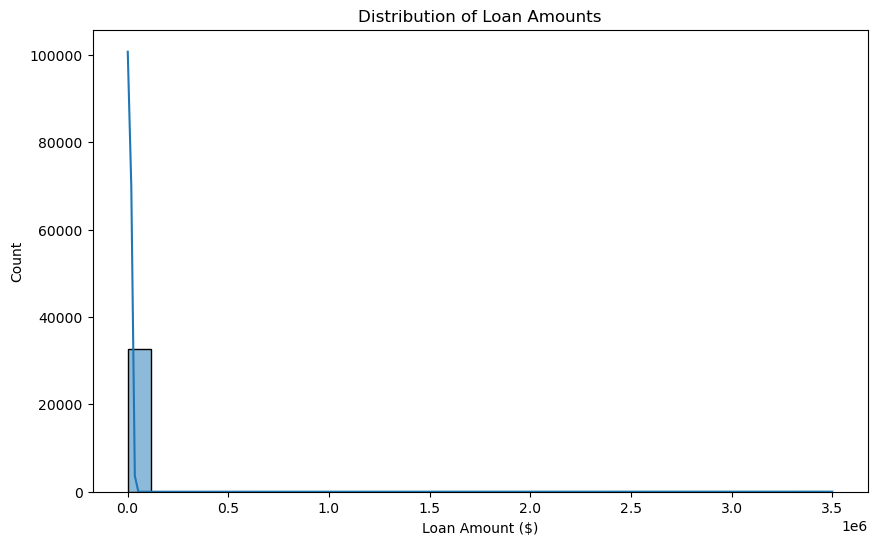

In [5]:
# Target distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['loan_amnt'].dropna(), bins=30, kde=True)
plt.title("Distribution of Loan Amounts")
plt.xlabel("Loan Amount ($)")
plt.show()

In [6]:
# Numerical features
num_cols = ['customer_age', 'customer_income', 'loan_int_rate',
           'employment_duration', 'term_years', 'cred_hist_length']

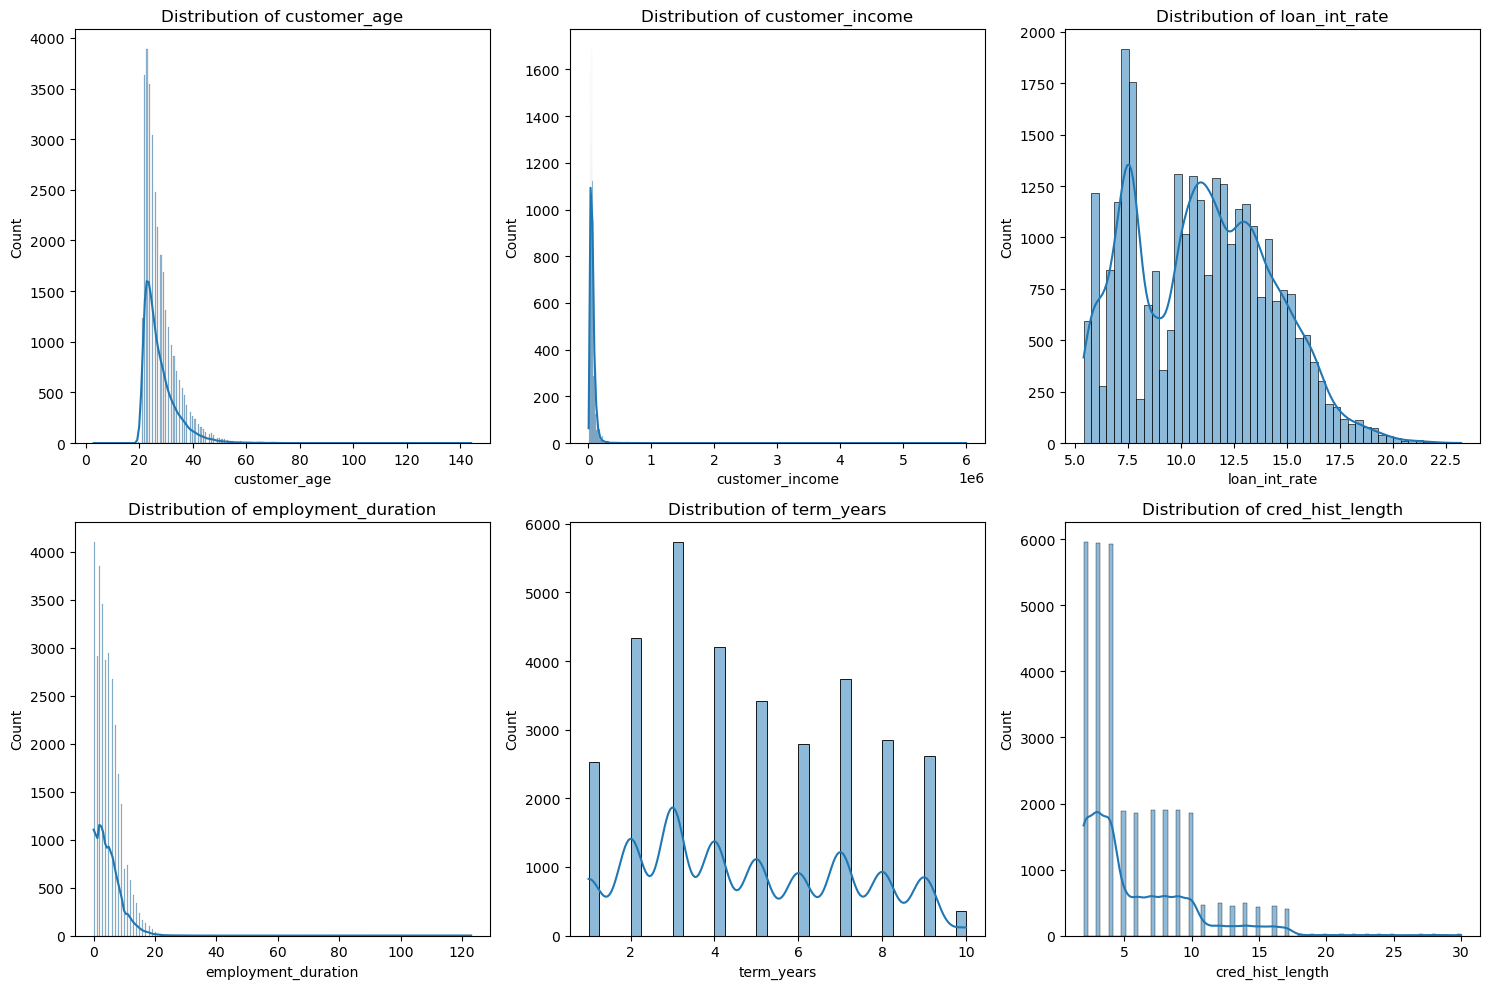

In [7]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

In [8]:
# Categorical features
cat_cols = ['home_ownership', 'loan_intent', 'loan_grade', 'historical_default']

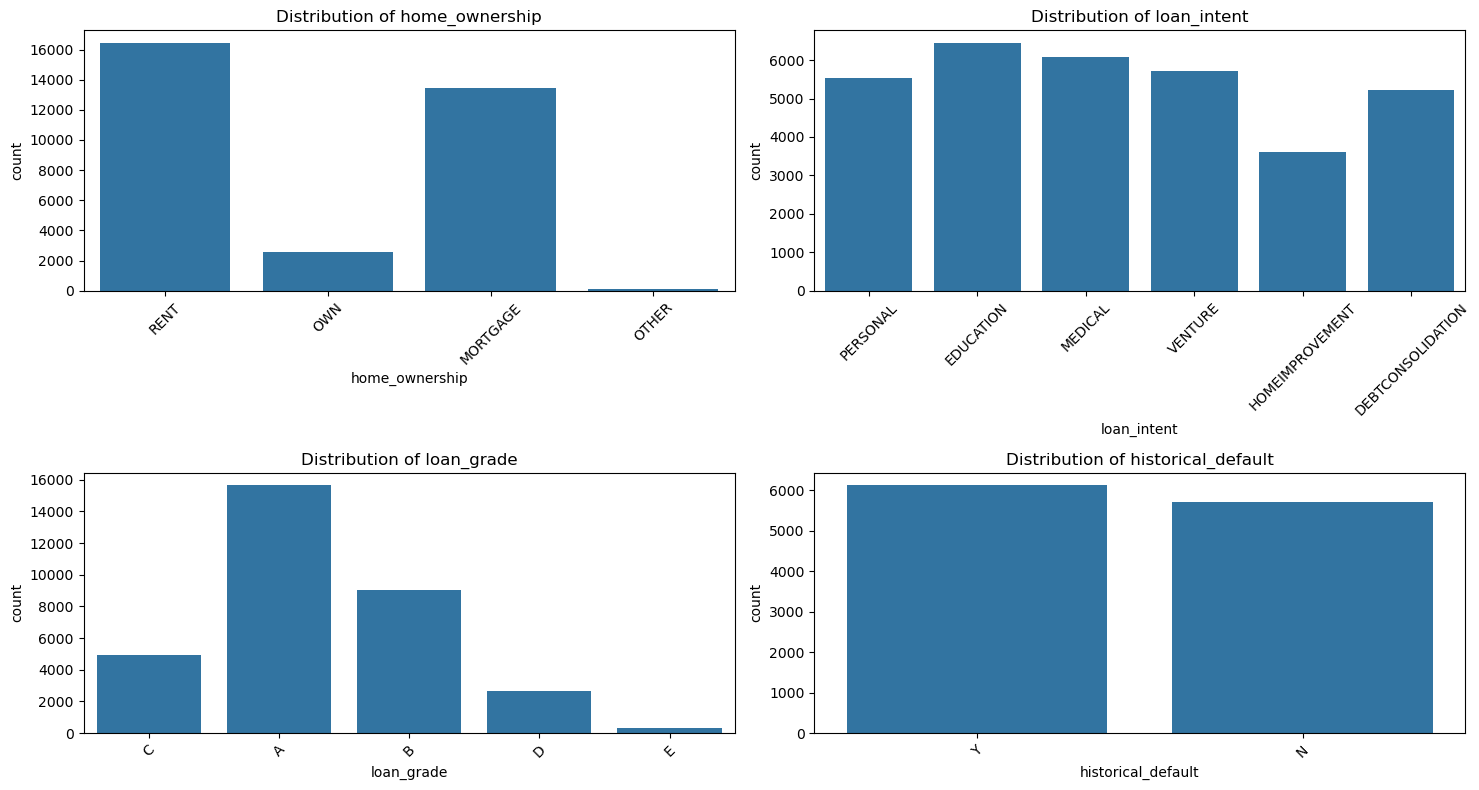

In [9]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

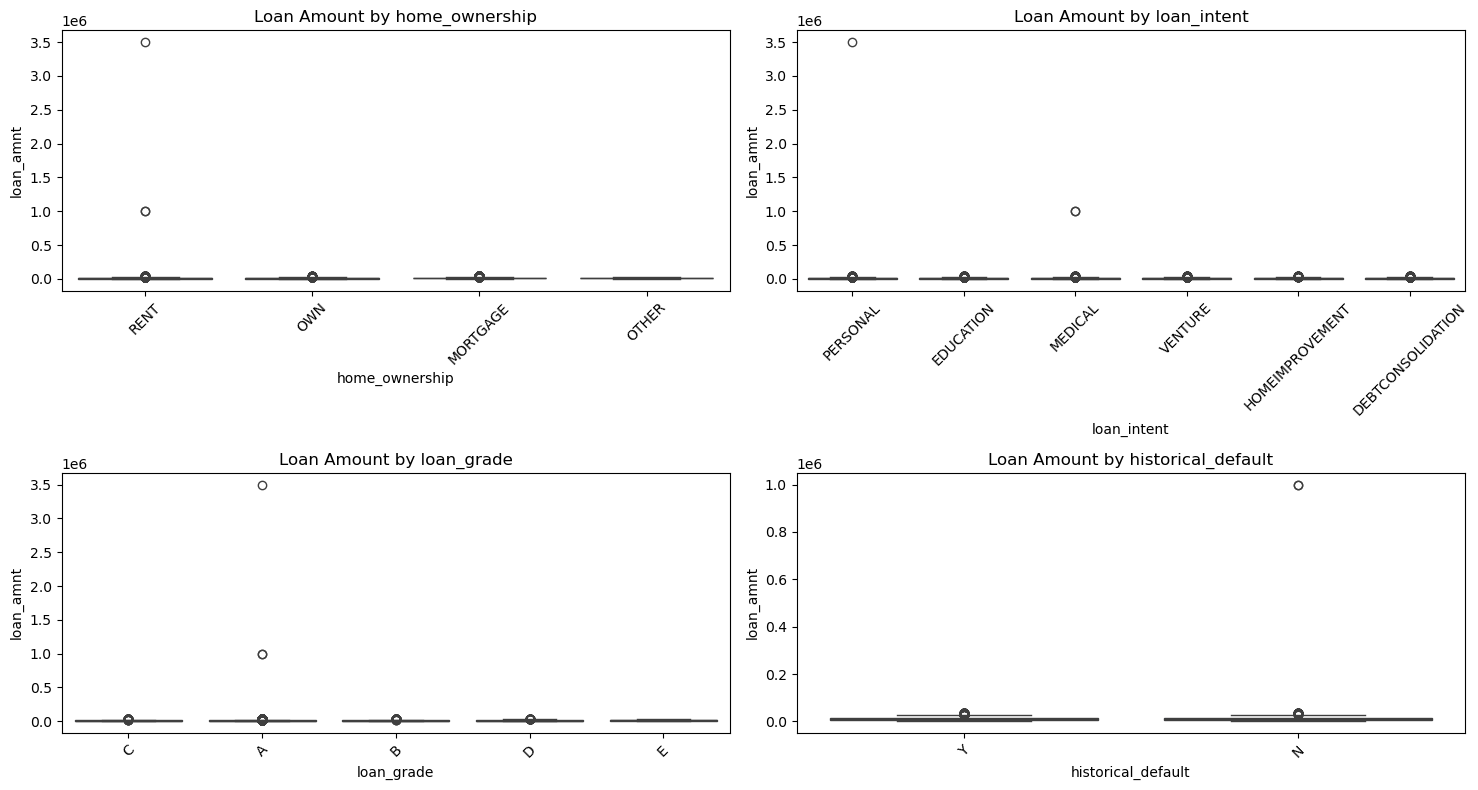

In [10]:
# Loan amount by category
plt.figure(figsize=(15, 8))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=col, y='loan_amnt', data=df)
    plt.title(f"Loan Amount by {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

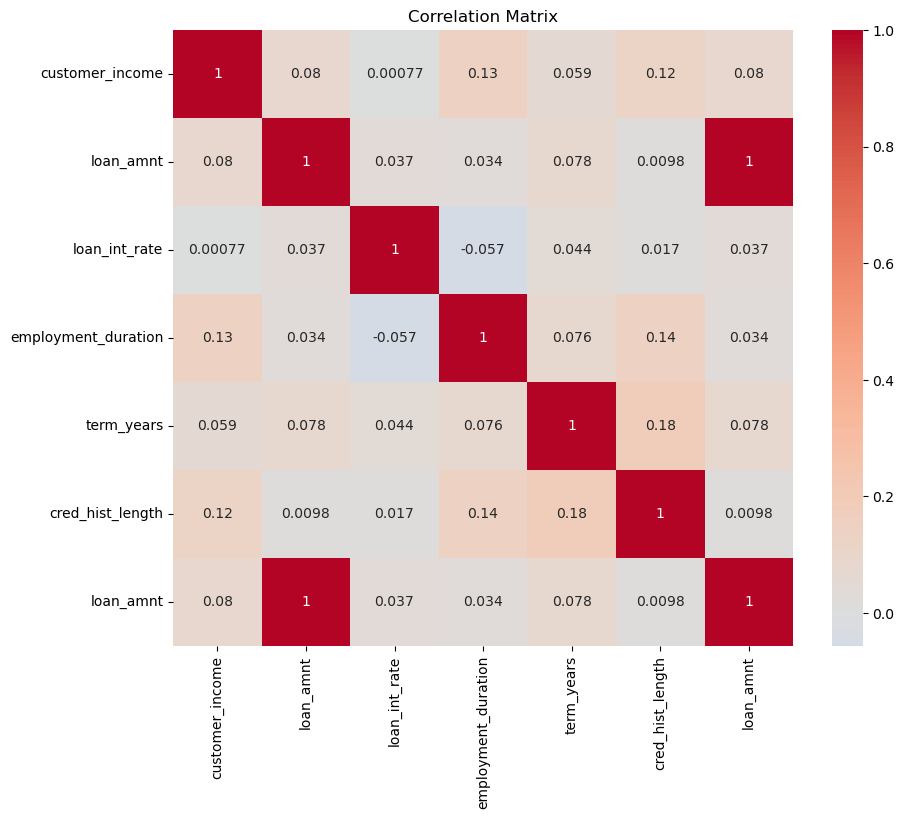

In [11]:
# Correlation matrix
corr = df[numeric_cols + ['loan_amnt']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()